In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact_manual, interact
import ipywidgets as widgets

In [66]:
# Loading data from JOHN HOPKIND repo
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
country_df.columns = map(str.lower, country_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)
death_df.columns = map(str.lower, death_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)

country_df = country_df.rename(columns={'country_region':'country'})
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})

sorted_df = country_df.sort_values(by='confirmed',ascending=False)

In [67]:
def highligh_col(x):
    r='background-color: red'
    p='background-color: purple'
    g='background-color: green'
    temp_df = pd.DataFrame('', index = x.index, columns= x.columns)
    temp_df['confirmed'] =p
    temp_df['deaths'] =r
    temp_df['recovered'] =g
    return temp_df

# entire table at once use axis=None
print("Cases split of worst affected countries")
sorted_df.head().style.apply(highligh_col, axis=None)

Cases split of worst affected countries


,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
176,US,2020-10-30 17:24:45,40.000000,-100.000000,8982804.000000,229096.000000,3554336.000000,5199350.000000,2726.471406,nan,nan,2.550384,840,USA
79,India,2020-10-30 17:24:45,20.593684,78.962880,8088851.000000,121090.000000,7373375.000000,594386.000000,586.146761,nan,nan,1.496999,356,IND
23,Brazil,2020-10-30 17:24:45,-14.235000,-51.925300,5494376.000000,158969.000000,4962574.000000,372833.000000,2584.866050,nan,nan,2.893304,76,BRA
141,Russia,2020-10-30 17:24:45,61.524000,105.318800,1588433.000000,27462.000000,1193867.000000,367104.000000,1088.456421,nan,nan,1.728874,643,RUS
62,France,2020-10-30 17:24:45,46.227600,2.213700,1327853.000000,36058.000000,120724.000000,1171071.000000,2034.290724,nan,nan,2.715511,250,FRA


In [68]:
confirmed_dates = confirmed_df.iloc[:,4:].transpose()
confirmed_dates.columns =confirmed_df['country']
confirmed_dates= confirmed_dates.reset_index()
confirmed_dates.columns.name = ''
confirmed_dates.columns = map(str.lower, confirmed_dates.columns)
# confirmed_dates.head()

death_dates = death_df.iloc[:,4:].transpose()
death_dates.columns =death_df['country']
death_dates= death_dates.reset_index()
death_dates.columns.name = ''
death_dates.columns = map(str.lower, death_dates.columns)
# death_dates.head()

recovered_dates = recovered_df.iloc[:,4:].transpose()
recovered_dates.columns =recovered_df['country']
recovered_dates= recovered_dates.reset_index()
recovered_dates.columns.name = ''
recovered_dates.columns = map(str.lower, recovered_dates.columns)
# recovered_dates.head()
country_list = [str.lower(i) for i in np.array(country_df['country']) ] 

In [69]:
import plotly.graph_objects as go
import plotly.express as px
country_list = [str.lower(i) for i in np.array(country_df['country']) ]
def plot_country_counts(country):
    country = country.lower()
    x_conf =confirmed_dates['index']
    x_death =death_dates['index']
    if country == "world":
        y_conf =confirmed_dates.iloc[:,1:].sum(axis=1)
        y_death = death_dates.iloc[:,1:].sum(axis=1)
    else:
        if country in country_list:
            y_conf = confirmed_dates[country]
            y_death = death_dates[country]
        else:
            return 'No country found'

    fig = go.Figure()
    fig.add_trace(go.Scatter( 
        x=x_conf, 
        y= y_conf,  
        mode='lines',
        showlegend=True,
        name ="Confirmed cases",
         line=dict(
            color='red',
            dash ='dot',
            width=3.5,
         )))
#     fig.add_trace(go.Scatter( 
#         x=recovered_dates["index"],
#         y= recovered_dates[country],
#         mode='lines',
#         showlegend=True,
#         name='Recovered Count',
#         line=dict(
#             color='yellow',
# #             dash ='dot',
#             width=3.5,
#         )))
    fig.add_trace(go.Scatter( 
        x=x_death, 
        y= y_death,
        mode='lines',
        showlegend=True,
        name='Death cases',
        line=dict(
            color='royalblue',
            dash ='dot',
            width=3.5,
        )))
    fig.update_layout(
        title=f'Status of {str.upper(country)}', 
        yaxis_title="Cases",
        xaxis_title ="Date",)
    fig.show()
interact_manual(plot_country_counts, country='world');

interactive(children=(Text(value='world', description='country'), Button(description='Run Interact', style=But…

In [70]:
interact_manual(plot_country_counts, country='india');

interactive(children=(Text(value='india', description='country'), Button(description='Run Interact', style=But…

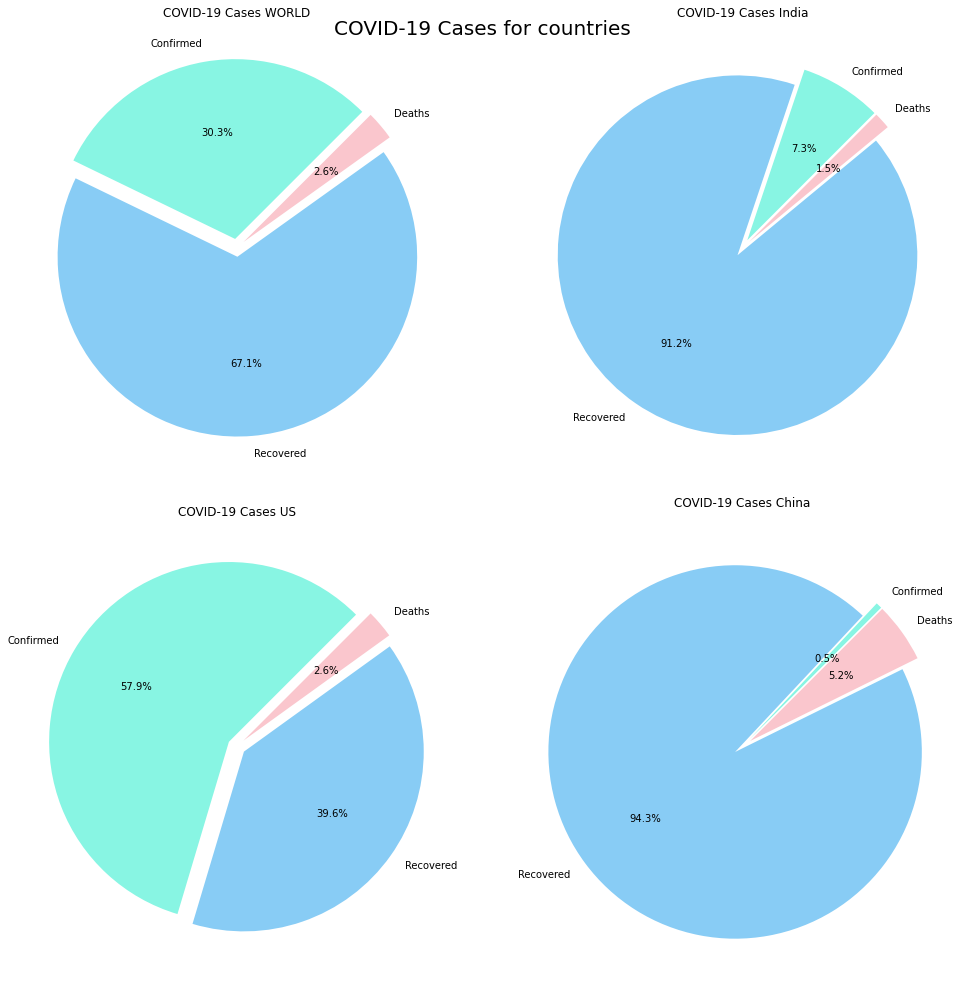

In [71]:
def plotPie():
    countries =['WORLD', 'India', 'US', 'China']
    labels = ['Confirmed','Recovered','Deaths']
    color=["#88F5E3",'#88CCF5','#FAC6CD']
    explode = []
    for i in labels:
        explode.append(0.05)
    fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
    plt.suptitle(f'COVID-19 Cases for countries',fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()
    for i,ax in enumerate(axes.flatten()):
        country = countries[i]
        total_death= 0
        total_recovered= 0
        total_confirmed= 0
        if country == "WORLD":
            total_death = country_df['deaths'].sum()
            total_recovered = country_df['recovered'].sum()
            total_confirmed = country_df['confirmed'].sum()
        else:
            total_death = country_df[country_df['country'] == country ]['deaths'].sum()
            total_recovered = country_df[country_df['country'] == country]['recovered'].sum()
            total_confirmed = country_df[country_df['country'] == country]['confirmed'].sum()
        total_active = total_confirmed -( total_recovered + total_death)
        sizes = [total_active,total_recovered,total_death]
        ax.pie(sizes,autopct='%1.1f%%',startangle=45,colors = color,explode =explode, labels =labels)
        ax.set_title(f'COVID-19 Cases {country}')
plotPie()

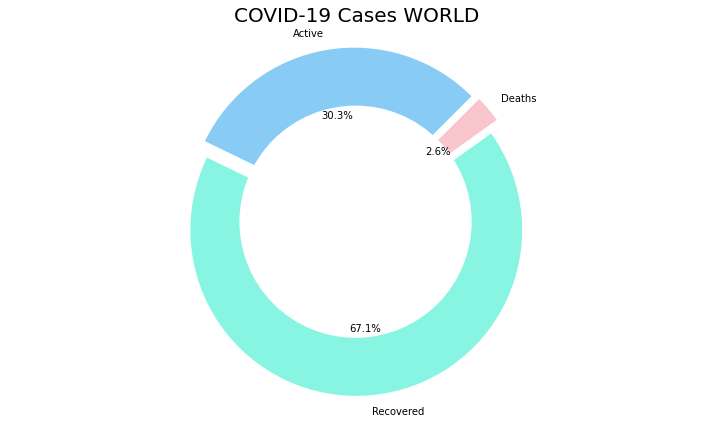

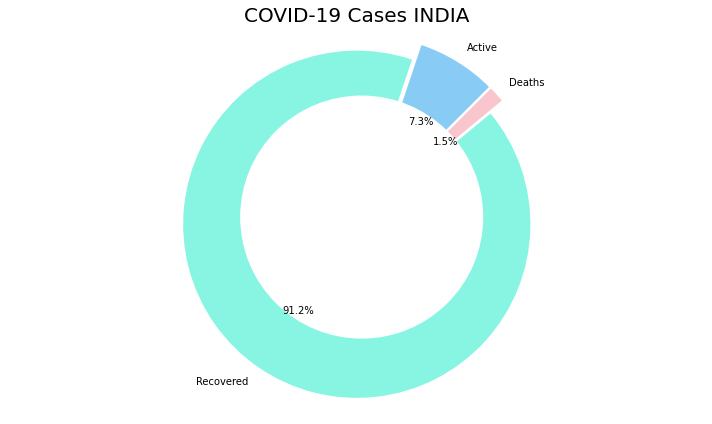

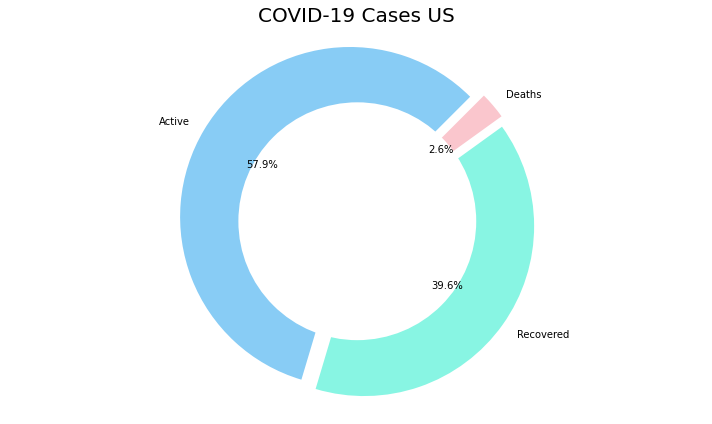

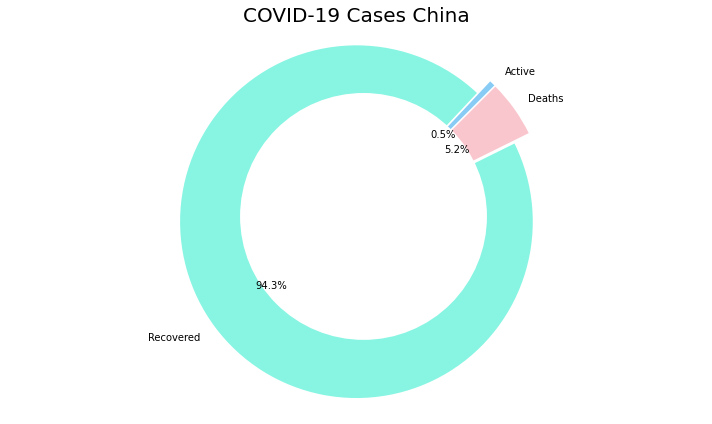

In [72]:
def plotPie(sizes, country ):
    labels = ['Active','Recovered','Deaths']
#     sizes = [total_confirmed,total_recovered,total_death]
    color=["#88CCF5",'#88F5E3','#FAC6CD']
    explode = []
    for i in labels:
        explode.append(0.05)

    plt.figure(figsize= (10,6))
    plt.pie(sizes,autopct='%1.1f%%',startangle=45,colors = color,explode =explode, labels =labels)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'COVID-19 Cases {country}',fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()
total_death = country_df['deaths'].sum()
total_recovered = country_df['recovered'].sum()
total_confirmed = country_df['confirmed'].sum()
total_active = total_confirmed -( total_recovered + total_death)
plotPie([total_active,total_recovered,total_death],'WORLD')
total_death = country_df[country_df['country'] == 'India']['deaths'].sum()
total_recovered = country_df[country_df['country'] == 'India']['recovered'].sum()
total_confirmed = country_df[country_df['country'] == 'India']['confirmed'].sum()
total_active = total_confirmed -( total_recovered + total_death)
plotPie([total_active,total_recovered,total_death],'INDIA')
total_death = country_df[country_df['country'] == 'US']['deaths'].sum()
total_recovered = country_df[country_df['country'] == 'US']['recovered'].sum()
total_confirmed = country_df[country_df['country'] == 'US']['confirmed'].sum()
total_active = total_confirmed -( total_recovered + total_death)
plotPie([total_active,total_recovered,total_death],'US')
total_death = country_df[country_df['country'] == 'China']['deaths'].sum()
total_recovered = country_df[country_df['country'] == 'China']['recovered'].sum()
total_confirmed = country_df[country_df['country'] == 'China']['confirmed'].sum()
total_active = total_confirmed -( total_recovered + total_death)
plotPie([total_active,total_recovered,total_death],'China')

In [73]:
from matplotlib.ticker import FuncFormatter

def plot_country_status(country):
    country = country.lower()
    x_conf =confirmed_dates['index']
    x_death =death_dates['index']
    if country == "world":
        y_conf =confirmed_dates.iloc[:,1:].sum(axis=1)
        y_death = death_dates.iloc[:,1:].sum(axis=1)
    else:
        if country in country_list:
            y_conf = confirmed_dates[country]
            y_death = death_dates[country]
        else:
            return 'No country found'
    fig =plt.figure(figsize=(16,6))
    # ax= sns.lineplot(x="index", y ="india", data =confirmed_dates)
    # sns.lineplot(x="index", y ="us", data =confirmed_dates, ax =ax )
    g = sns.scatterplot(x=x_conf, y = y_conf)
    sns.scatterplot(x=x_death, y =y_death, ax =g)
    for i,label in enumerate(g.get_xticklabels()):
        if i % 10 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
    g.set(xlabel='Date', ylabel='Cases count')
    fig.legend(labels=['Confirmed cases','Deaths reported'])
    fig.autofmt_xdate()


    f = lambda x, pos: f'{x/10**6:,.0f}M'
    g.yaxis.set_major_formatter(FuncFormatter(f))
    _=g.set_title(f'Trend of number of infections in {str.upper(country)}',fontsize = 20)
    

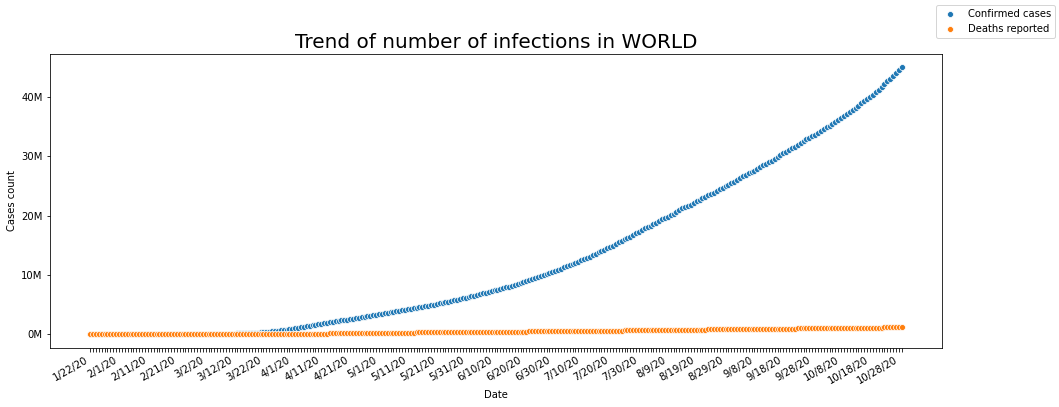

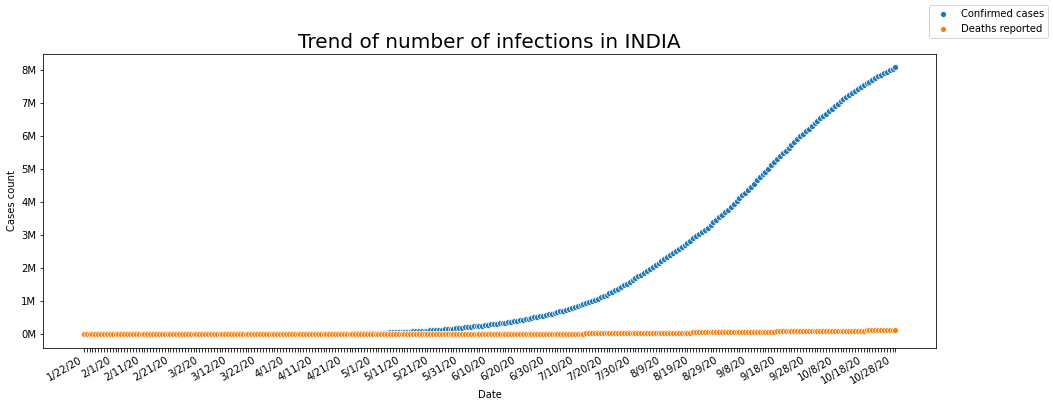

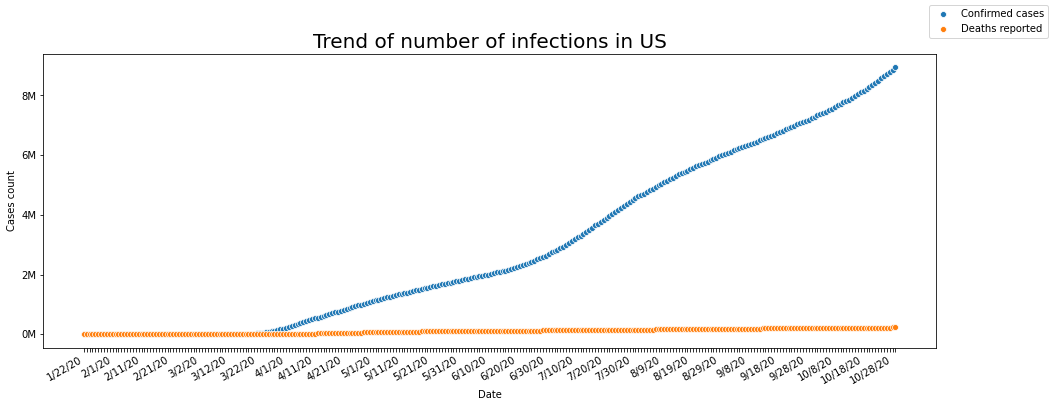

In [74]:
plot_country_status('world')
plot_country_status('india')
plot_country_status('us')
# interact(plot_country_status, country='world');

In [75]:
import folium
from folium.plugins import MarkerCluster
def plot_map(df, title):
    world_map = folium.Map(location=[38.9, -77.05],
                  tiles='cartodbpositron',
                    zoom_start=2,
                    max_zoom =12,
                    min_zoom=1)
    marker_cluster = MarkerCluster().add_to(world_map)
    for i in range(len(df)):
        folium.Marker([df.iloc[i].lat, df.iloc[i].long_],
                         tooltip=f'<i><b>{df.iloc[i].country}</b> </br> Confirmed cases: {df.iloc[i].confirmed}</br>Recovered cases: {df.iloc[i].recovered}</br>Death cases: {df.iloc[i].deaths}</i>',
                            icon=folium.Icon(color='red', icon='info-sign')).add_to(marker_cluster)
    
    title_html = '''
                 <h3 align="center" style="font-size:16px"><b>{}</b></h3>
                 '''.format(title)  
    
    world_map.get_root().html.add_child(folium.Element(title_html))
    return world_map   

In [76]:
country_fil =country_df[pd.notnull(country_df.lat)] 
plot_map(country_fil,'Cases count per country')

Text(0.5, 1.0, 'Top affected countries counts')

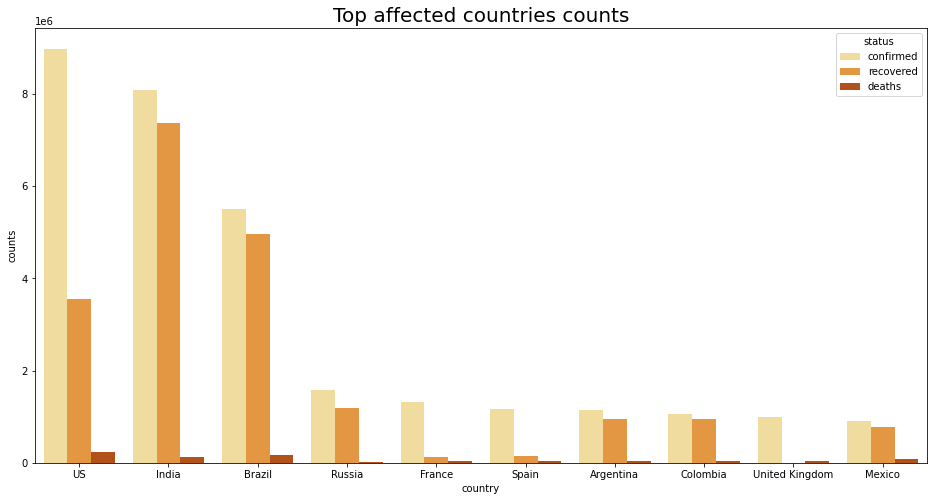

In [77]:
plt.figure(figsize=(16,8))
tidy = pd.melt(sorted_df.head(10)[['country','confirmed','recovered','deaths']], id_vars="country", var_name="status",value_name='counts')
ax = sns.barplot(x="country",y ="counts", hue="status",data =tidy,palette=("YlOrBr"))
ax.set_title("Top affected countries counts",fontsize = 20) 

In [78]:
def getTopAffectedCountries(param):
    countries = country_df.sort_values(by=param,ascending=False).head(5).country.values
    cols = list(confirmed_df.columns[4:])
    cols.append('country')
    df = confirmed_df;
    title = "Countries with Top 5 confirmed cases"
    if(param =="deaths"):
        df =death_df
        title = "Countries with Top 5 reported death  cases"
    elif param == "recovered":
        title = "Countries with highest recovery counts"
        df = recovered_df
    df = df[cols]
    
    df = df[df['country'].isin(countries)].drop_duplicates(subset="country")
    df = df.set_index('country',)
    df = df.loc[countries]
    
    df.reset_index(inplace= True)
    df = pd.melt(df,id_vars="country")
    
    fig =plt.figure(figsize=(16,6))
    g = sns.scatterplot( x='variable', y= "value", hue="country", data=df,palette=("Set3"))
    for i,label in enumerate(g.get_xticklabels()):
        if i % 10 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
    g.set(xlabel='Date', ylabel='Cases count')
    # fig.legend(labels=['Confirmed cases','Deaths reported'])
    fig.autofmt_xdate()

    f = lambda x, pos: f'{x/10**3:,.0f}k'
    g.yaxis.set_major_formatter(FuncFormatter(f))
    _=g.set_title(title,fontsize = 20)   

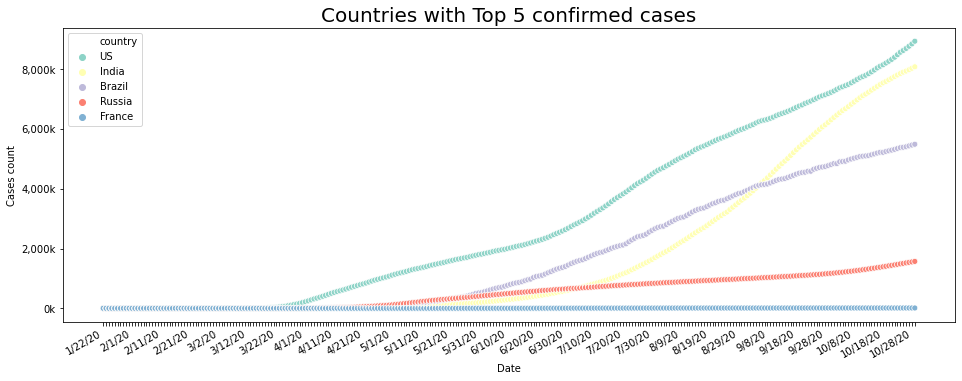

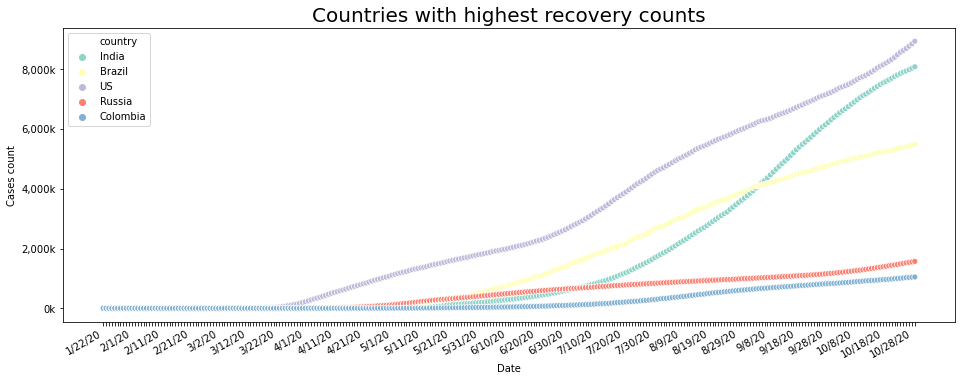

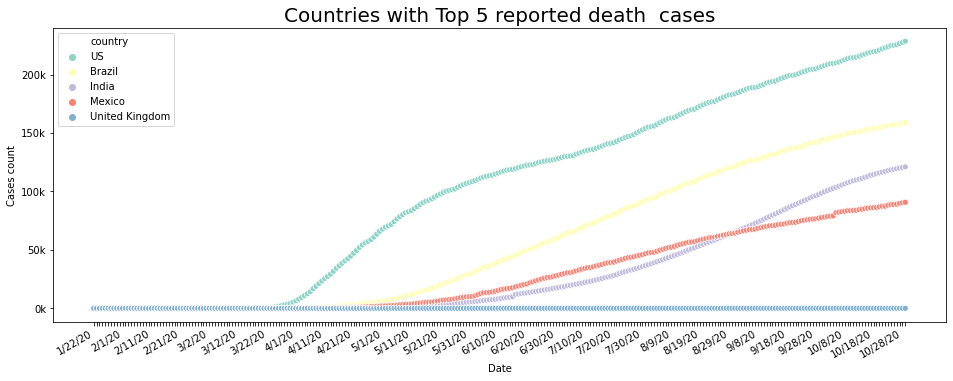

In [79]:
getTopAffectedCountries('confirmed')
getTopAffectedCountries('recovered')
getTopAffectedCountries('deaths')

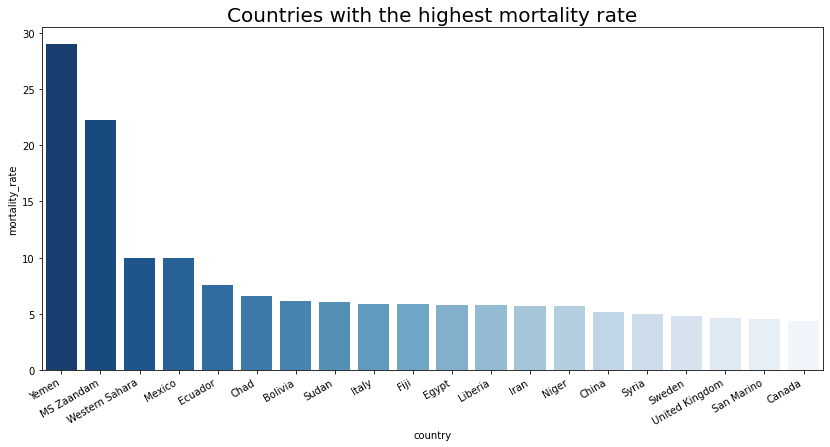

In [80]:
fig =plt.figure(figsize=(14,7))
ax=sns.barplot(x ="country", y ="mortality_rate", palette=("Blues_r"), data = country_df.drop_duplicates('country').sort_values(by=['mortality_rate','country'], ascending=False).head(20))
fig.autofmt_xdate()
_=ax.set_title("Countries with the highest mortality rate",fontsize = 20)

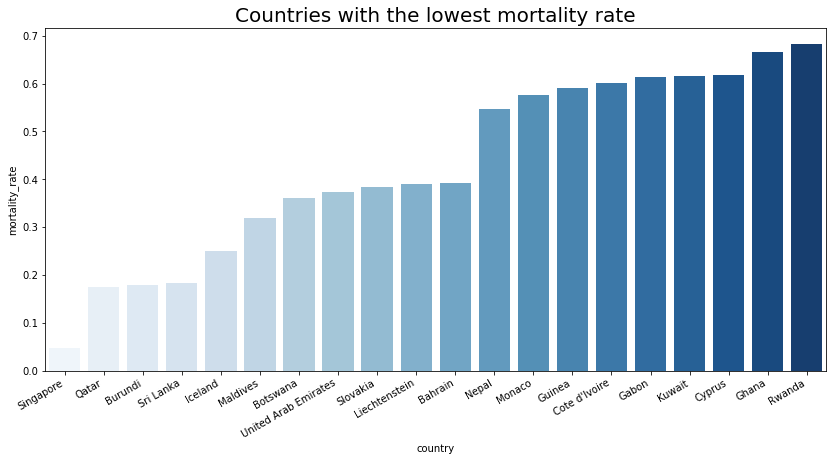

In [81]:
fig =plt.figure(figsize=(14,7))
ax=sns.barplot(x ="country", y ="mortality_rate", palette=("Blues"), data = country_df[country_df['deaths']> 0].drop_duplicates('country').sort_values(by=['mortality_rate','country'], ascending=True).head(20))
fig.autofmt_xdate()
_=ax.set_title("Countries with the lowest mortality rate",fontsize = 20)

In [82]:
zero_deaths_df = country_df[country_df['deaths'] == 0]
plot_map(zero_deaths_df,'Countries with no death cases')

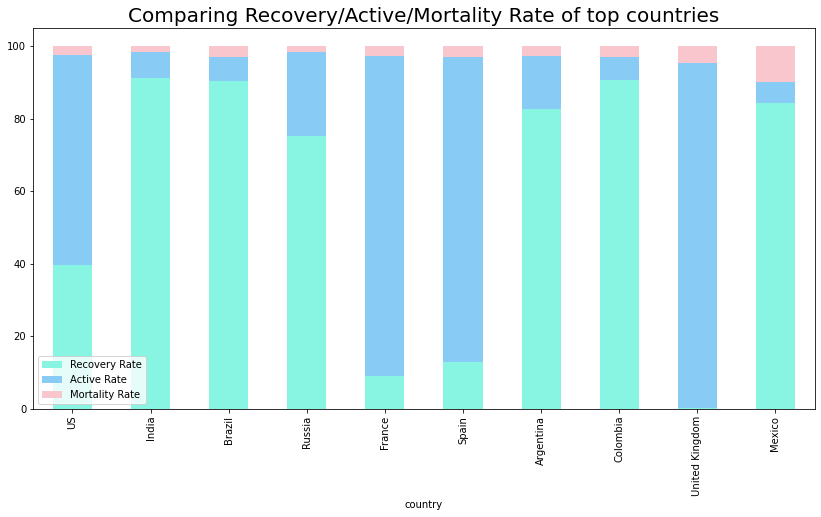

In [83]:
sorted_df['recov_rate'] = country_df['recovered']*100/country_df['confirmed']
sorted_df['active_rate'] =country_df['active']*100/country_df['confirmed']
ax = sorted_df[['country','recov_rate','active_rate','mortality_rate']].head(10).set_index('country').plot(kind="bar", stacked = True,figsize=(14,7),color=["#88F5E3",'#88CCF5','#FAC6CD'])
ax.legend(labels=['Recovery Rate', 'Active Rate', 'Mortality Rate'])
_=ax.set_title("Comparing Recovery/Active/Mortality Rate of top countries",fontsize = 20)

In [84]:
india_df = pd.read_csv("covid_19_india.csv")
state_test_df = pd.read_csv("StatewiseTestingDetails.csv")
state_test_df = state_test_df[state_test_df['State'] != "Dadra and Nagar Haveli and Daman and Diu"]
india_df = india_df[india_df['State/UnionTerritory'] != "Dadra and Nagar Haveli and Daman and Diu"]
state_aggr = state_test_df.groupby('State').sum()
state_aggr['positive_rate'] = state_aggr['Positive']*100/state_aggr['TotalSamples']
hotspots = list(india_df.groupby('State/UnionTerritory')['Confirmed'].max().sort_values(ascending= False).head(7).index)
safespots = list(india_df.groupby('State/UnionTerritory')['Confirmed'].max().sort_values(ascending= True).head(7).index)
state_aggr['Negative'] = state_aggr['TotalSamples'] - state_aggr['Positive']
states_test = list(state_aggr.sort_values(by="TotalSamples", ascending=False).index)
states_test_least = list(state_aggr.sort_values(by="TotalSamples", ascending=True).index)
state_aggr['negative_rate'] = state_aggr['Negative']*100/state_aggr['TotalSamples']

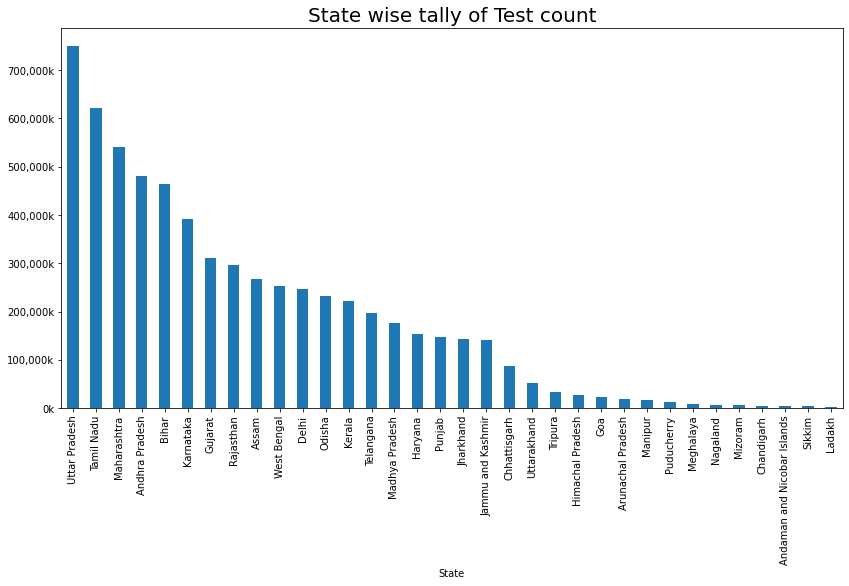

In [85]:
ax = state_aggr['TotalSamples'].sort_values(ascending=False).plot(kind="bar", figsize =(14,7))
f = lambda x, pos: f'{x/10**3:,.0f}k'
ax.yaxis.set_major_formatter(FuncFormatter(f))
_=ax.set_title('State wise tally of Test count',fontsize = 20)

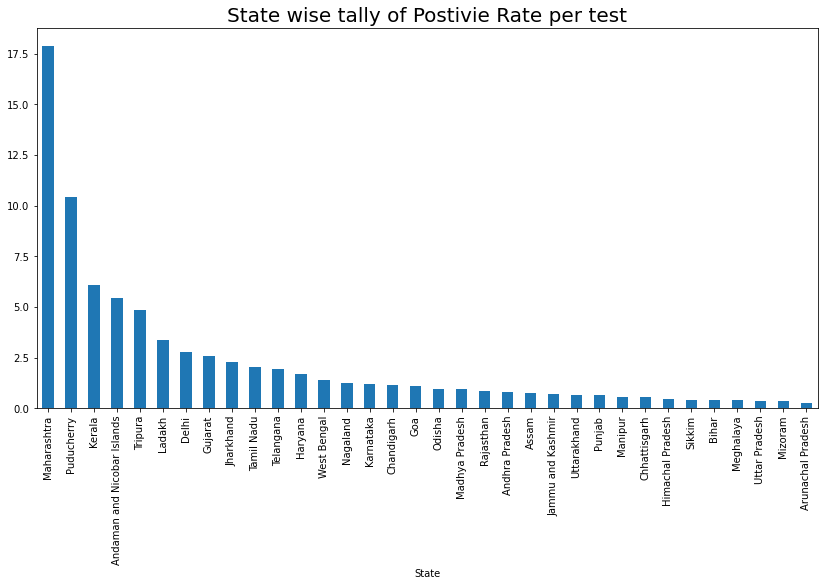

In [86]:
ax = state_aggr['positive_rate'].sort_values(ascending=False).plot(kind="bar", figsize =(14,7))
_ = ax.set_title('State wise tally of Postivie Rate per test',fontsize = 20)

In [87]:
def plotStateCounts(param,spots = hotspots, heading= "Worst"):
    fig =plt.figure(figsize=(16,6))
    df = india_df[india_df['State/UnionTerritory'].isin(spots)]
    g = sns.scatterplot( x='Date', y= param, hue="State/UnionTerritory", data=df, palette=("Set3"))
    for i,label in enumerate(g.get_xticklabels()):
        if i % 10 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
    g.set(xlabel='Date', ylabel='Cases count')
        # fig.legend(labels=['Confirmed cases','Deaths reported'])
    fig.autofmt_xdate()

    f = lambda x, pos: f'{x:,.0f}'
    g.yaxis.set_major_formatter(FuncFormatter(f))
    _=g.set_title(f'{heading} Affected States {param} Cases count',fontsize = 20)   

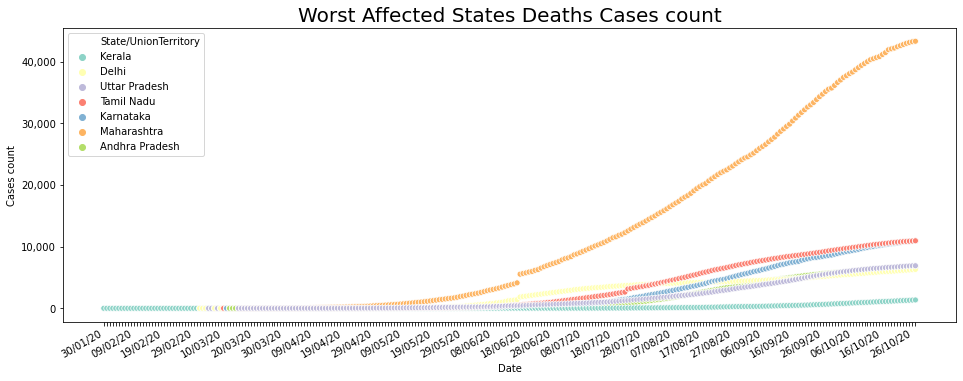

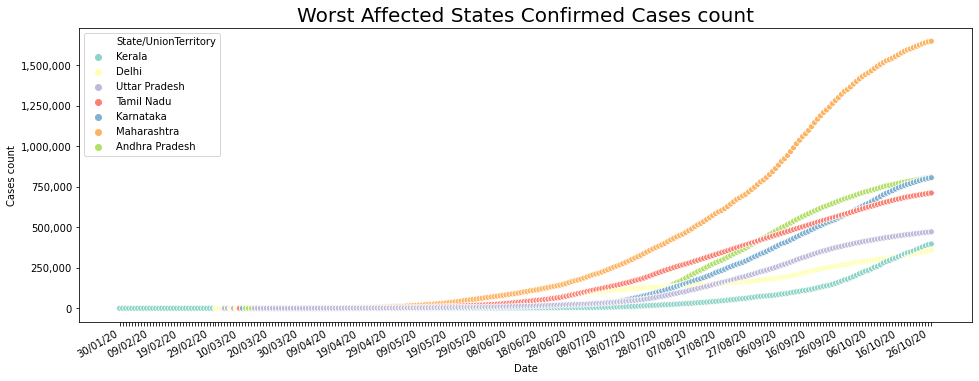

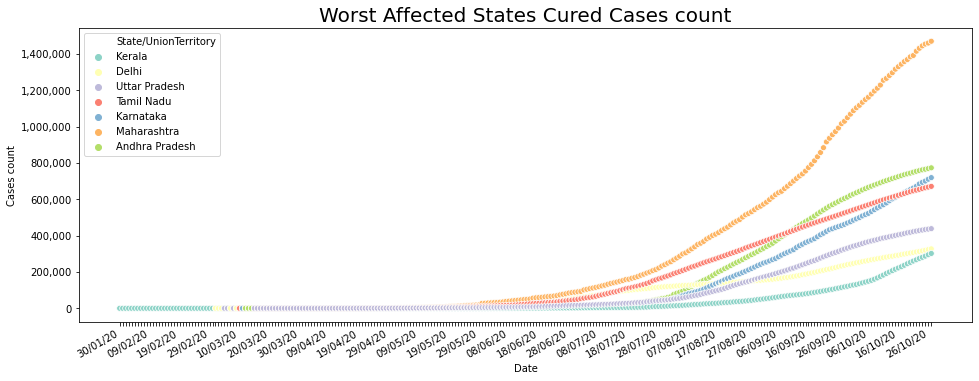

In [88]:
plotStateCounts('Deaths')
plotStateCounts('Confirmed')
plotStateCounts('Cured')

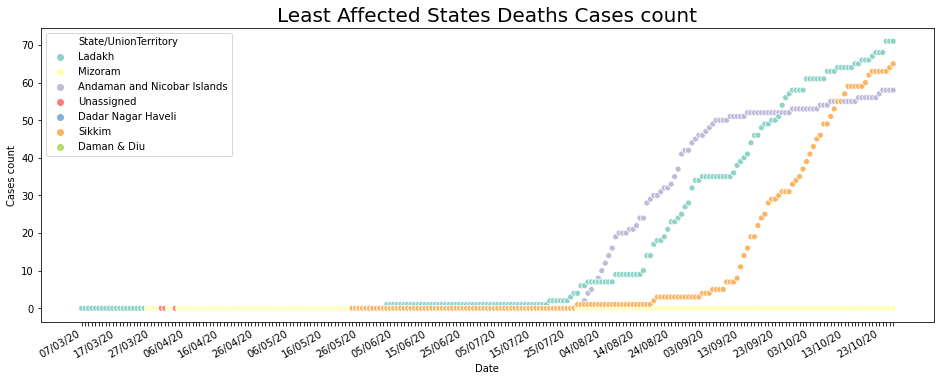

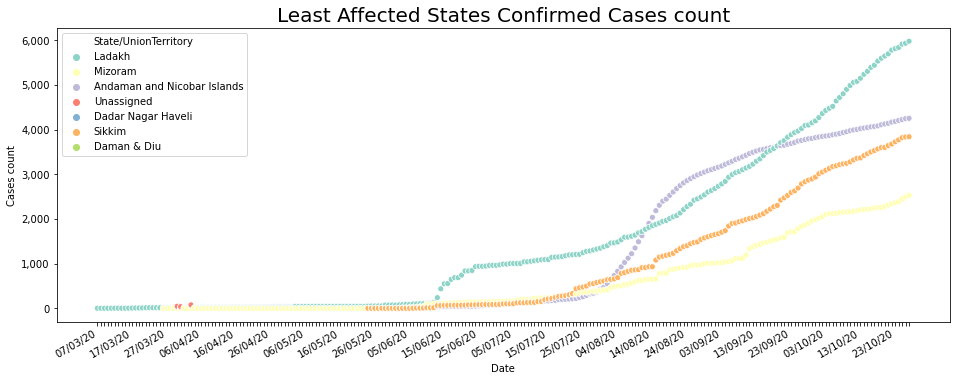

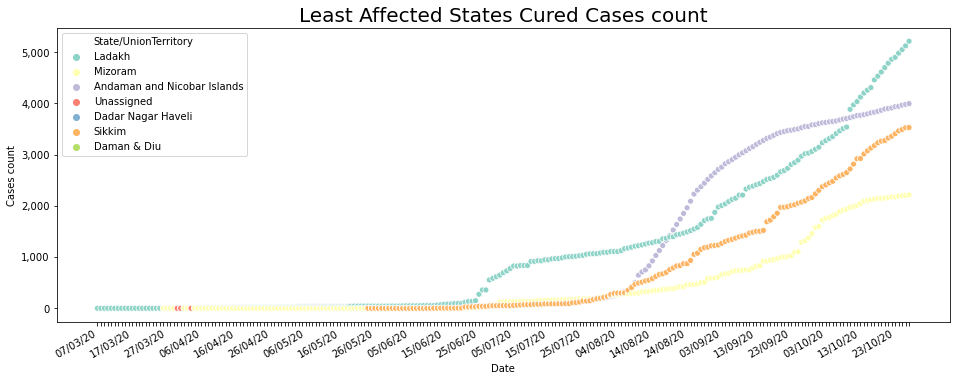

In [89]:
plotStateCounts('Deaths',safespots, 'Least')
plotStateCounts('Confirmed',safespots, 'Least')
plotStateCounts('Cured',safespots, 'Least')

In [90]:
def plotTestResults(states, title ="most"):
    fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
    plt.suptitle(f'COVID-19 Test results for {title} tested states',fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()
    # print (axes)
    for i,ax in enumerate(axes.flatten()):
        labels = ['Positive','Negative']
        state = state_aggr[state_aggr.index ==states[i]]
        sizes = [state['Positive'],state['Negative']]
        color=["#88F5E3",'#88CCF5']
        explode = []
        for k in labels:
            explode.append(0.05)
        ax.pie(sizes,autopct='%1.1f%%',startangle=45,colors = color,explode =explode, labels =labels)
        _= ax.set_title(states_test[i])

<ipython-input-90-68d34b5c8c23>:15: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



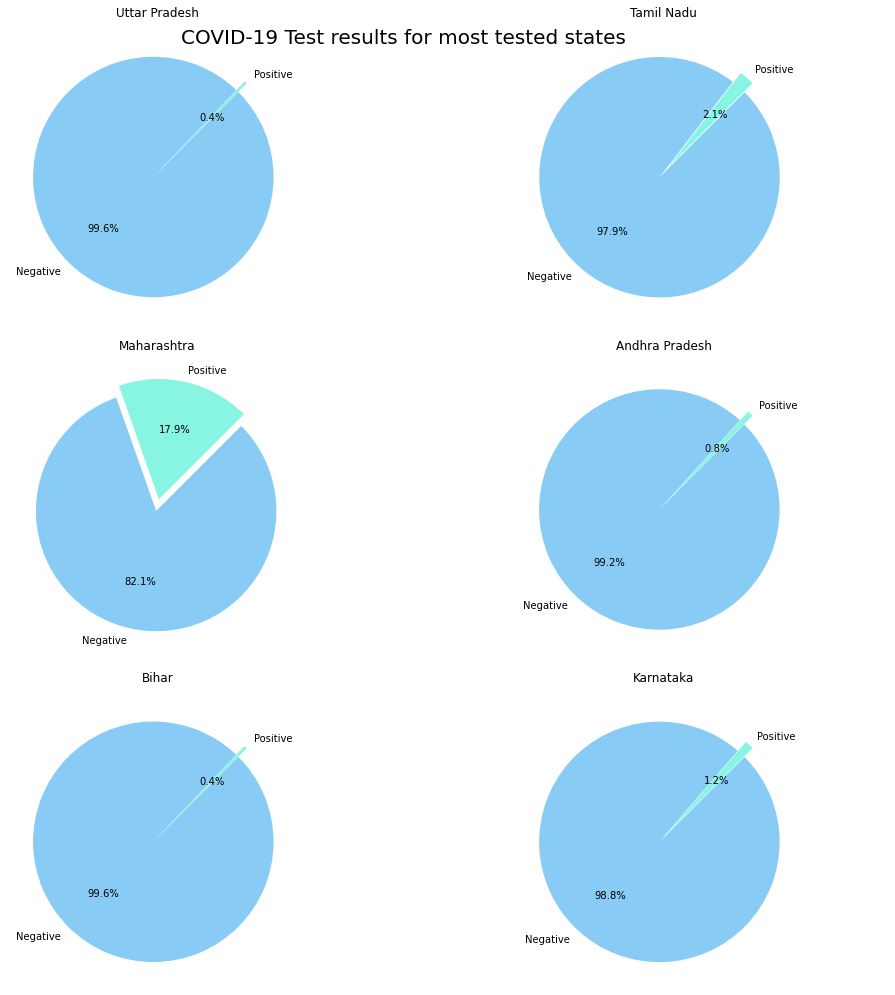

In [91]:
plotTestResults(states_test)

<ipython-input-90-68d34b5c8c23>:15: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



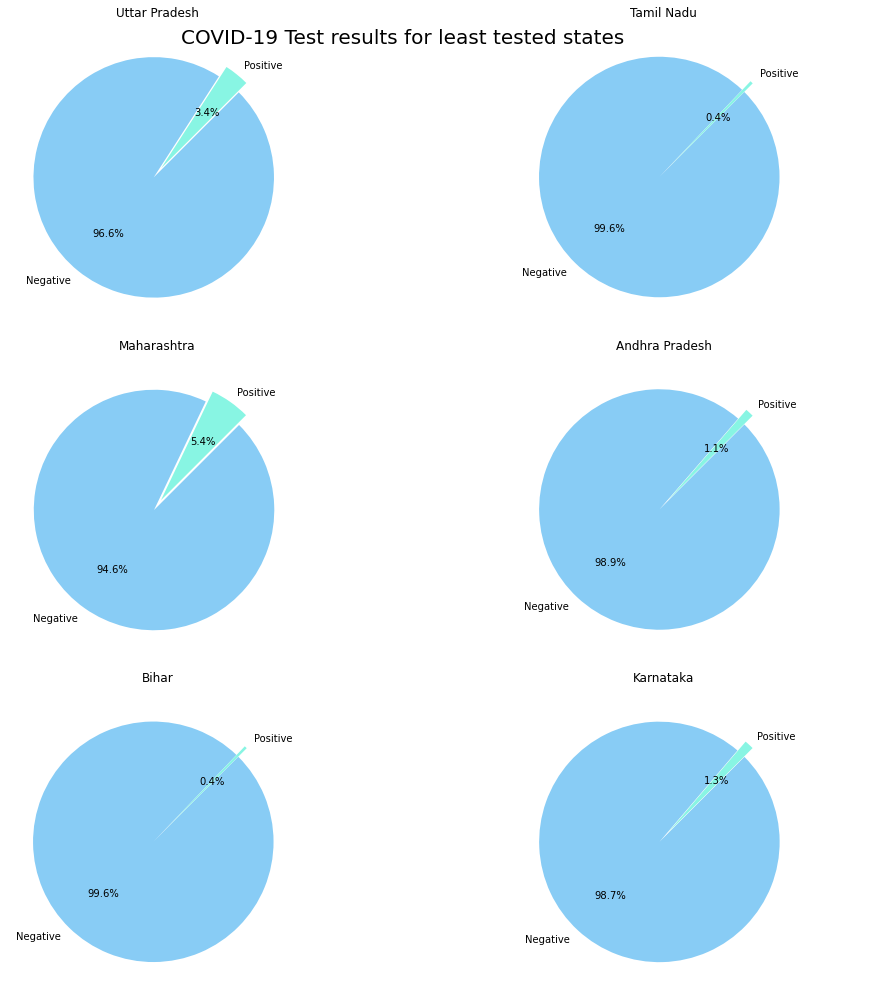

In [92]:
plotTestResults(states_test_least,'least')

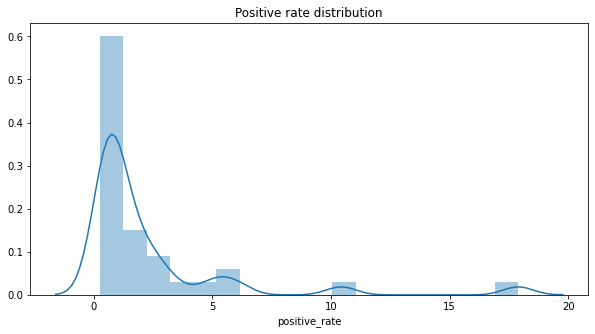

In [93]:
plt.figure(figsize=(10,5))
ax = sns.distplot(state_aggr['positive_rate'])
_= ax.set_title('Positive rate distribution')

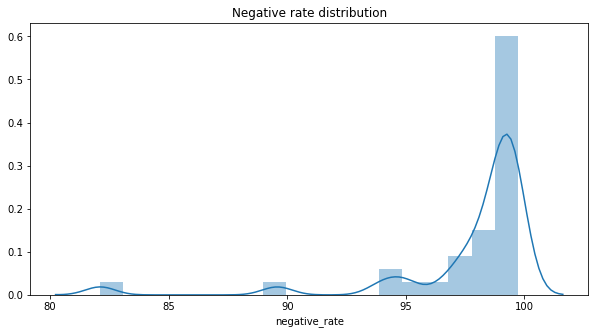

In [94]:
plt.figure(figsize=(10,5))
ax = sns.distplot(state_aggr['negative_rate'])
_= ax.set_title('Negative rate distribution')


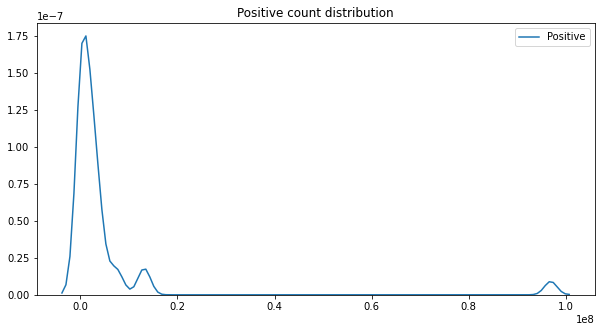

In [95]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(state_aggr['Positive'])
_= ax.set_title('Positive count distribution')

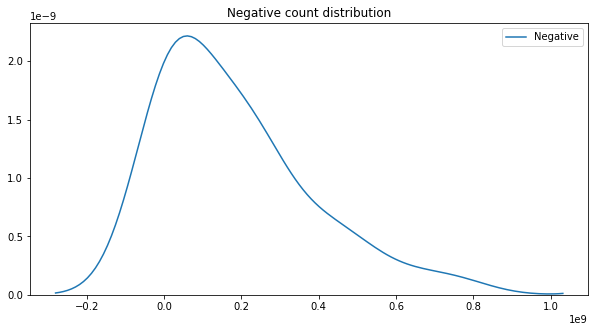

In [96]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(state_aggr['Negative'])
_= ax.set_title('Negative count distribution')